# Lightcurve Manipulation

In [1]:
#%matplotlib notebook
# github.com/signal-k/polygon
!pip install lightkurve

import matplotlib.pyplot as plt
import lightkurve as lk


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Star selection

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

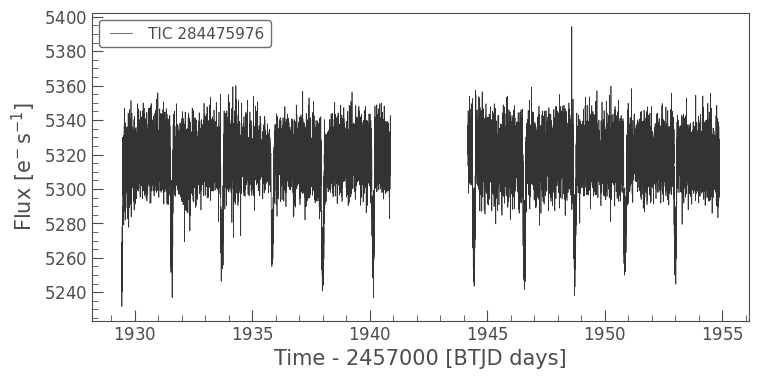

In [2]:
TIC = 'TIC 284475976' # TIC Star ID
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 23) # can remove each arg if needed
sector_data
lc = sector_data.download()
lc.plot()

In [3]:
lc.plot(linewidth = 0, marker = '.', color = 'lightcyan', alpha = 0.3)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

## Plotting from multiple sectors

In [4]:
TIC_2 = 'TIC 55525572'
available_data_all = lk.search_lightcurve(TIC_2, author = 'SPOC')
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,55525572,0.0
1,TESS Sector 05,2018,SPOC,120,55525572,0.0
2,TESS Sector 06,2018,SPOC,120,55525572,0.0
3,TESS Sector 08,2019,SPOC,120,55525572,0.0
4,TESS Sector 09,2019,SPOC,120,55525572,0.0
5,TESS Sector 10,2019,SPOC,120,55525572,0.0
6,TESS Sector 11,2019,SPOC,120,55525572,0.0
7,TESS Sector 12,2019,SPOC,120,55525572,0.0
8,TESS Sector 13,2019,SPOC,120,55525572,0.0


In [5]:
select_sector = available_data_all[0:4]
select_sector

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,55525572,0.0
1,TESS Sector 05,2018,SPOC,120,55525572,0.0
2,TESS Sector 06,2018,SPOC,120,55525572,0.0
3,TESS Sector 08,2019,SPOC,120,55525572,0.0


In [6]:
lc_collection = select_sector.download_all() # download all the sectors ([0:4])
lc_collection

LightCurveCollection of 4 objects:
    0: <TessLightCurve LABEL="TIC 55525572" SECTOR=4 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 55525572" SECTOR=5 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 55525572" SECTOR=6 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    3: <TessLightCurve LABEL="TIC 55525572" SECTOR=8 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [7]:
lc_collection.plot(linewidth = 0, marker = '.')

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

### Normalise graph points

In [8]:
lc_collection_stitched = lc_collection.stitch()
lc_collection_stitched.plot(linewidth = 0, marker = '.', color = 'red')

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [9]:
lc.normalize().plot()
normalized_lc = lc.normalize()

## Binning Data

- Simplify the data

- Take multiple data points -> take them to one data point

- Get rid of noise

Bin width is set (now) at 15 minutes, takes the average of all data points in each bin [width]

The larger the bin size, the less shape is preserved, and the less data is available to be manipulated

In [10]:
bin_time = 15/24/60 # LK uses day units, this is 15 minutes over 24 hours
#lc_collection_binned = lc_collection.bin(bin_time)
#lc_collection_binned.plot()

### Plotting region

Allows us to plot multiple data sets on one figure/graph

In [11]:
fig, ax = plt.subplots(figsize = (10, 5))
lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markerSize = 1)
lc_collection_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'black', markerSize = 1)

AttributeError: 'Line2D' object has no property 'markerSize'

## Phase Folding

Fold different periods of separation of transit events onto each other 

`t0` -> first transit point

if (period == wrong) { lightDips != lineUp } /#/ Basic (if `t0` is wrong)

In [0]:
!pip install lightkurve

import matplotlib.pyplot as plt
import lightkurve as lk
TIC = 'TIC 55525572'

In [0]:
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[0:9] # Query data, select data from mutliple sectors (e.g. all availablke first year TESS data)
lc_collection = available_data_select.download_all().stitch()

In [0]:
fig, ax = plt.subplots(figsize = (8,4))
lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1, alpha = 0.7)

In [0]:
period = 83.8979
t0 = 2125.847

lc_phased = lc_collection.fold(period = period, epoch_time = t0)
lc_phased.plot(linewidth = 0, color = 'gold', marker = '.', markersize = 1, alpha = 0.7)

lc_phased_binned = lc_phased.bin(15/24/60)
fig, ax = plt.subplots(figsize = (8,5)) # defines a plotting region to plot multiple data sets
lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'blue', alpha = 0.4, markersize = 3, label = 'unbinned')
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'purple', alpha = 0.8, markersize = 6, label = 'binned')

plt.xlim(-2, 2) # upper and lower limit for x-axis, zooming in from -40, 40 wide to -2, 2 wide
plt.ylim(0.996, 1.004) 

## Determining planet stats

Use the fraction of light from the star being blocked out (in the dip) and compare that with the size of the parent star (make sure to account for things like ASB stars, but assume most to all stars observed will be main sequence).

Area of light -> area of planet (sphere -> disk): ![](https://latex.codecogs.com/svg.image?area(planet)%20=%20\pi%20R^2)

Area of star:
![](https://latex.codecogs.com/svg.image?area(star)%20=%20\pi%20R^2)


$$ transitDepth = ({rPlanet \over rStar})^2 $$

$$ rPlanet = \sqrt{transitDepth} \times rStar $$

In [0]:
import matplotlib.pyplot as plt
import lightkurve as lk

plt.axhline(0.9988) # look at graph
plt.xlim(-2, 2) # upper and lower limit for x-axis, zooming in from -40, 40 wide to -2, 2 wide
plt.ylim(0.996, 1.004)

# https://deepnote.com/workspace/star-sailors-49d2efda-376f-4329-9618-7f871ba16007/project/Anomaly-Interaction-ab6b31e5-13c3-4949-af38-1197d00bd4d1
# https://deepnote.com/workspace/star-sailors-49d2efda-376f-4329-9618-7f871ba16007/project/lightkurvehandler-dca7e16c-429d-42f1-904d-43898efb2321
# https://deepnote.com/workspace/star-sailors-49d2efda-376f-4329-9618-7f871ba16007/project/Star-Sailors-Light-Curve-Plot-b4c251b4-c11a-481e-8206-c29934eb75da

In [0]:
!pip install astropy
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

In [0]:
transit_depth = 1 - 0.9988
R_star = 2.04354 * u.Rsun # exofop.ipac.caltech.edu/tess/target.php?id=TIC * radius of [our] sun
r_pl_solar_radius = np.sqrt(transit_depth) * R_star

In [0]:
r_pl_solar_radius

Some simple ideas/notes very briefly:

1. Move the plot into an interactive format (like a Zooniverse frontend fork) and look at where users "click" on "curves", save that to a DB

undefined. Connect DeepNote to Umbrel? -> https://b4c251b4-c11a-481e-8206-c29934eb75da.deepnoteproject.com

undefined. Spectroscopy -> https://tess.mit.edu/followup/

In [0]:
visits = _deepnote_execute_sql('select\n    visits.user_id,\n    visits.visited_at,\n    users.signed_up_at,\n    users_ab.variant\nfrom\n    visits\n    left join users on visits.user_id = users.user_id\n    inner join users_ab on visits.user_id = users_ab.user_id', 'SQL_26D1FA15_65F7_4B77_8193_83C3976930E2', audit_sql_comment='', sql_cache_mode='cache_disabled')
visits

# Lightweight Curve Manipulation

In [0]:
!pip install lightkurve

import matplotlib.pyplot as plt
import lightkurve as lk

In [0]:
TIC = 'TIC 284475976'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 23)
sector_data

In [0]:
lc = sector_data.download()
lc.plot

In [0]:
lc.plot(linewidth = 0, marker = '.', color = 'lightcyan', alpha = 0.8)

## Conversion Rate

We need to check whether one variant resulted in a higher conversion rate than another. Let's start with a time series.

In [0]:
visits['registered'] = visits.signed_up_at.notna()
visits = visits.sort_values('visited_at').drop_duplicates('user_id',keep='first').copy()

conversion = visits.copy()
conversion['week'] = conversion.visited_at.dt.tz_localize(None).dt.to_period('W').dt.to_timestamp()
conversion = conversion.groupby(['variant','week']).registered.value_counts(normalize=True,dropna=False).reset_index(name='conversion')
conversion = conversion.loc[conversion.registered == True]

In [0]:
DeepnoteChart(conversion, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"temporal","field":"week","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"conversion","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"variant","scale":{"type":"linear","zero":false}}}}""")

Here is the overall conversion rate for each variant:

In [0]:
conversion.groupby('variant').conversion.mean().reset_index(name='conversion_rate')

### Significance Test

It looks like Variant B has a higher conversion rate than Variant A. We need to make sure these results are significant.

In [0]:
from scipy.stats import chi2_contingency

# Calculate the proportion of registered users for variant A vs B
proportions = visits.groupby('variant').registered.value_counts(dropna=False).reset_index(name='nusers')
proportions = proportions.pivot(index='variant',columns='registered',values='nusers')

# Chi-Square test
g,p,dof,expctd = chi2_contingency(proportions)

print(f'p-value is {p}')
if p < 0.05:
    print(f'The difference in Conversion Rate between Variants A and B is statistically significant.')
else:
    print(f'The difference in Conversion Rate between Variants A and B is NOT statistically significant.')

## Retention Rate

We also want to know whether one variant of the website results in higher retention than another variant. For this, let's look at the weekly sessions of our users.

In [0]:
sessions_weekly = _deepnote_execute_sql('select\n    sessions.user_id,\n    date_trunc(\'week\',users.signed_up_at) as signed_up_at_week,\n    floor(extract(\'day\' from session_started_at - signed_up_at)/7) as week, -- The number of weeks that passed since the user signed up\n    users_ab.variant\nfrom\n    sessions\n    left join users on sessions.user_id = users.user_id\n    inner join users_ab on sessions.user_id = users_ab.user_id', 'SQL_26D1FA15_65F7_4B77_8193_83C3976930E2', audit_sql_comment='', sql_cache_mode='cache_disabled')
sessions_weekly

In [0]:
import pandas as pd

def get_retention(df):
    retention = df.copy()

    # Save the cohort size before we start calculating retention
    cohort_size = retention.groupby(['signed_up_at_week']).user_id.nunique().reset_index(name='cohort_size')

    # For each cohort-week, calculate the number of users who visited
    retention = retention.groupby(['signed_up_at_week','week']).user_id.nunique().reset_index(name='n_users')

    # Pivot and melt the table. This is a little trick that allows us to add rows during weeks where a cohort was not active.
    retention = retention.pivot(index=['signed_up_at_week'],columns='week',values='n_users').fillna(0)
    retention = retention.melt(value_name='n_users',ignore_index=False).reset_index()

    # If part of the cohort is still not finished the week, then exclude that cohort-week from the data
    # To do this we add 6 days to the sign up date. This gives us the last sign ups of that cohort.
    retention = retention.loc[
        ~(retention.signed_up_at_week + pd.to_timedelta(retention.week + 1,'W') + pd.Timedelta(6,'D') >
        pd.Timestamp.now(tz='UTC').floor('D'))
    ]

    # Divide by the cohort size to get a percentage
    retention = retention.merge(cohort_size,on=['signed_up_at_week'])
    retention['prop'] = retention.n_users / retention.cohort_size

    retention_avg = retention.groupby('week').prop.mean().reset_index()

    retention_avg = retention_avg.rename(columns = dict(
        prop='Retention',
        week='Week',
    ))

    return retention_avg

sessions_a = sessions_weekly.loc[sessions_weekly.variant == 'variant_a']
retention_a = get_retention(sessions_a)
retention_a['variant'] = 'variant_a'

sessions_b = sessions_weekly.loc[sessions_weekly.variant == 'variant_b']
retention_b = get_retention(sessions_b)
retention_b['variant'] = 'variant_b'

retention = pd.concat([retention_a,retention_b])

In [0]:
DeepnoteChart(retention, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Week","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Retention","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"variant","scale":{"type":"linear","zero":false}}}}""")

Here is the Week-4 Retention for each variant.

In [0]:
retention.loc[retention.Week == 4][['variant','Retention']].reset_index(drop=True)

### Significance Test

Once again, check that the difference in retention is significance.

In [0]:
from scipy.stats import ttest_ind

# Label all users who retained 4+ weeks later
users_retention = sessions_weekly.groupby(['user_id','variant']).apply(lambda x: x.week.max() >= 4).reset_index(name='retained')

# Calculate the proportion of retained users for variant A vs B
proportions = users_retention.groupby('variant').retained.value_counts(dropna=False).reset_index(name='nusers')
proportions = proportions.pivot(index='variant',columns='retained',values='nusers')

# Chi-Square test
g,p,dof,expctd = chi2_contingency(proportions)

print(f'p-value is {p}')
if p < 0.05:
    print(f'The difference in Retention between Variants A and B is statistically significant.')
else:
    print(f'The difference in Retention between Variants A and B is NOT statistically significant.')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4c251b4-c11a-481e-8206-c29934eb75da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>